<a href="https://colab.research.google.com/github/Vatsala-18/MachineLearning/blob/main/Project_RealEstatePricePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/Real estate.csv')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [4]:
# DATA VISUALISATION
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


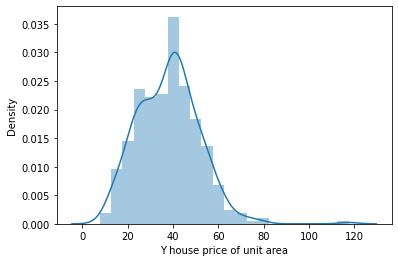

In [5]:
sns.distplot(df['Y house price of unit area'])   
plt.show()

In [6]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [60]:
#DATA CLEANING
estate_new = df.drop(['No'],axis=1)   #unwanted data dropped
estate_new

,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...
409,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [61]:
#0-5 cols are input and last column i.e 'Y house price of unit area' is output
#giving input
x = estate_new.iloc[:,0:6].values
x

array([[2012.917  ,   32.     ,   84.87882,   10.     ,   24.98298,
         121.54024],
       [2012.917  ,   19.5    ,  306.5947 ,    9.     ,   24.98034,
         121.53951],
       [2013.583  ,   13.3    ,  561.9845 ,    5.     ,   24.98746,
         121.54391],
       ...,
       [2013.25   ,   18.8    ,  390.9696 ,    7.     ,   24.97923,
         121.53986],
       [2013.     ,    8.1    ,  104.8101 ,    5.     ,   24.96674,
         121.54067],
       [2013.5    ,    6.5    ,   90.45606,    9.     ,   24.97433,
         121.5431 ]])

In [62]:
#output
y = estate_new.iloc[:,6].values

In [63]:
# train test and split

In [64]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)    #predicted values should match, random_state=0
#75% data is given for training and 25% data is given for testing

In [65]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(414, 6)
(310, 6)
(104, 6)


In [66]:
#RUN A REGRESSOR

from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [67]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [68]:
y_pred = model.predict(x_test)    #predicting values or prices real estate

In [69]:
y_pred

array([39.77553366, 13.17464404, 42.60236133, 12.97950622, 42.73500839,
       40.44929328, 41.25851582, 33.92786512, 50.03454779, 46.38521155,
       46.46910747, 41.01122834, 39.19970453, 40.59919198, 47.16603031,
       38.77258549, 40.70294332, 40.73780768, 41.00822713, 42.74143464,
       49.77941948, 31.48395857, 39.66799459, 45.71759304, 46.26133491,
       43.75626466, 47.18350034, 25.96187857, 48.44464107, 21.75445237,
       45.5554519 , 35.46196014, 42.29276595, 38.95327294, 44.36091261,
       32.90815613, 48.24749509, 39.9622292 , 52.79708247,  7.19700255,
       53.33284997, 33.10682152, 34.04725912, 50.50642749, 15.77538222,
       43.95924793, 42.51688474, 12.86179952, 34.31696765, 49.32138204,
       54.49036707, 38.75491207, 48.02711608, 25.8183059 , 31.01389302,
       34.43186513, 49.2062856 , 40.9899754 , 43.62071235, 33.10353472,
       44.67446259, 44.46386412, 39.45220639, 47.23776745, 36.96463449,
       30.22144453,  9.47329974, 35.44989063, 45.94534296, 40.44

In [70]:
y_test


array([45.3, 14.4, 46. , 15.6, 50.2, 38.1, 48.5, 41.4, 51.6, 40.1, 42. ,
       42.4, 28.5, 39.1, 53.7, 36.8, 40.6, 55.2, 39.3, 44.3, 53.5, 25.3,
       22.8, 51.7, 45.5, 34.4, 31.6, 25.9, 49.5, 24.7, 51.7, 29.7, 45.4,
       50.5, 26.5, 30.1, 46.1, 28.9, 54.4, 15. , 44.9, 29.8, 23.6, 48. ,
       16.7, 40.9, 40.2, 12.9, 21.3, 62.1, 63.9, 40.3, 42.2, 19.1, 28.4,
       28.5, 60.7, 37.5, 39.3, 28.8, 42.3, 44.3, 42.6, 57.4, 42.2, 25.7,
       13.2, 27. , 56.2, 38.3, 20.8, 43.1, 78.3, 20.9, 32.5, 33.4, 32.1,
       19.2, 53. , 38.2, 46.7, 24.6, 36.2, 23.2, 29.3, 38.4, 37.5, 34.3,
       44.8, 54.4, 37.9,  7.6, 29.5, 25.3, 13.7, 30. , 30.8, 40.6, 20.7,
       40.8, 55.3, 40.5, 40.8, 40.3])

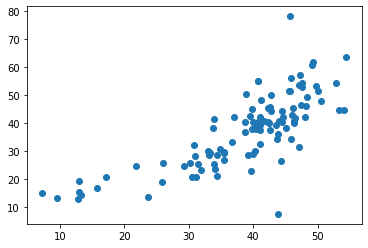

In [71]:
plt.scatter(y_pred,y_test)

In [72]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5827152586477559

In [73]:
df1 = pd.DataFrame({'Actual Price' : y_test, 'Predicted Price' : y_pred})   #created a new dataframe
df1

,Actual Price,Predicted Price
0,45.3,39.775534
1,14.4,13.174644
2,46.0,42.602361
3,15.6,12.979506
4,50.2,42.735008
...,...,...
99,40.8,46.331466
100,55.3,40.737808
101,40.5,40.022384
102,40.8,41.664432


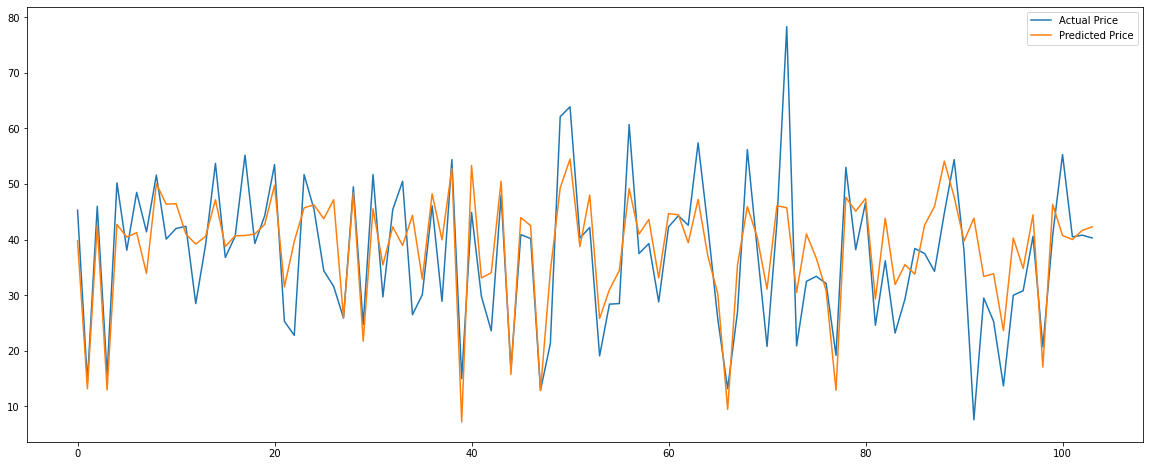

In [74]:
df1.plot(figsize=(20,8))    #pandas plotting to show the prices
plt.show()

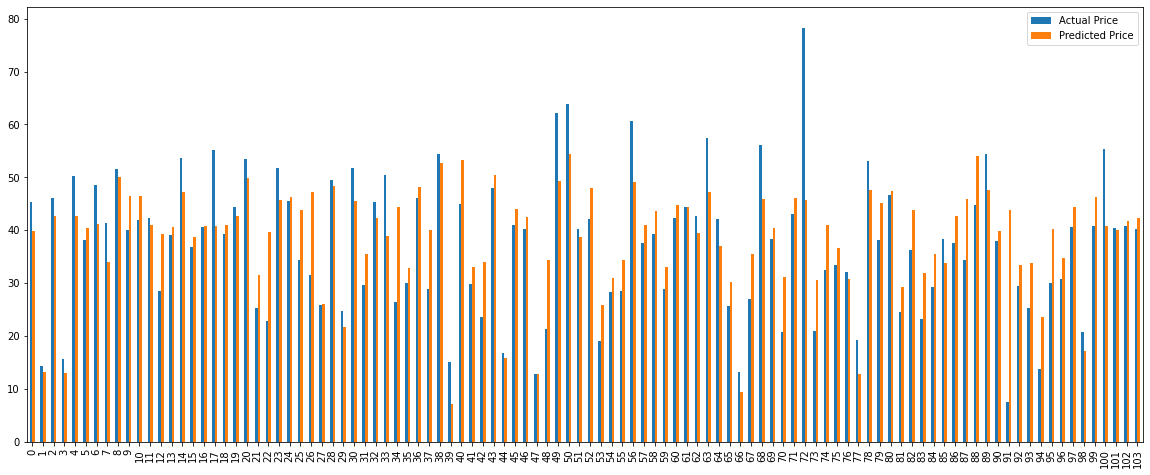

In [75]:
df1.plot(figsize=(20,8),kind='bar')    #pandas plotting to show the prices
plt.show()

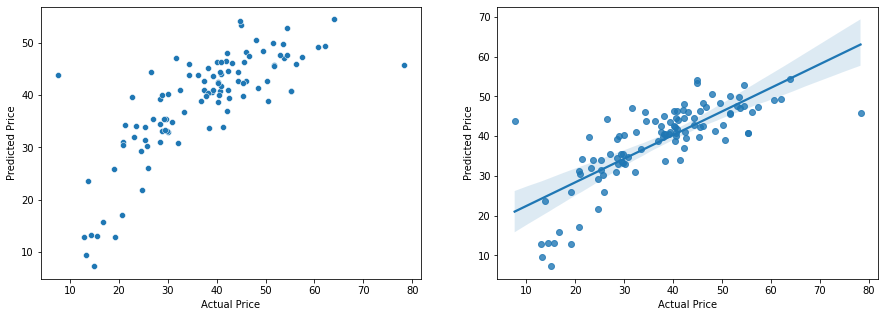

In [76]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.scatterplot(x='Actual Price',y='Predicted Price', data = df1)

plt.subplot(1,2,2)
sns.regplot(x='Actual Price',y='Predicted Price', data = df1)